In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate


# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_cleaned.csv")
# Display sample data
df

,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,0,12,0,26.57,4,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0,25.61,3,2,3,1,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0,21.77,1,2,0,1,1,9,...,0,1,0,0,0,0,1,0,0,0
3,1,12,0,26.08,0,1,0,0,0,7,...,0,0,1,0,1,0,1,0,0,1
4,0,12,1,22.96,3,0,0,1,0,7,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318920,1,9,3,29.86,2,0,15,1,0,7,...,0,1,0,0,1,0,1,0,0,1
318921,1,2,0,31.19,2,0,0,1,0,8,...,0,1,0,0,0,0,1,0,0,0
318922,0,6,1,28.66,4,2,2,1,0,7,...,0,0,0,0,0,0,1,0,0,0
318923,1,10,1,32.55,3,0,0,0,1,5,...,0,0,1,0,0,1,1,0,0,0


# 5. Machine Learning

### 5.1. Linear Regression Model
##### 5.1.1 Building Model

In [3]:
# Copy dataset for Machine Learning
df1 = df.copy()

In [4]:
# Split the data into feature (X) and target variable (y)
X = df1.drop("HeartAttack", axis=1)
y = df1["HeartAttack"]

In [5]:
# Dealing with Imbalanced Data
# Assuming X is your feature DataFrame and y is your target variable
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# X_resampled and y_resampled are now your new balanced datasets

In [6]:
# Split the data using train_test_split # stratify=y
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

##### 5.1.2. Create a Logistic Regression Model with the Original Data

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=78)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=78)

In [8]:
# Make a prediction using the testing data

# Make a prediction using the X_test
y_prediction = model.predict(X_test)

# Create a DataFrame for the predicted y values
df_y_prediction = pd.DataFrame({"y_test": y_test, "prediction": y_prediction})
df_y_prediction.sample(10)

,y_test,prediction
498680,1,1
156977,0,1
365027,1,1
378881,1,1
491673,1,1
11802,0,0
49240,0,0
569840,1,1
387743,1,0
181223,0,0


##### 5.1.3. Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Confusion Matrix:
[[62739 12639]
 [16461 59151]]


In [10]:
# Print the classification report for the model

# Set the target variable labels
target_label_names = ["No (0)", "Yes (1)"]

# Print the classification report for the model
print("The classification report for the model:")
print(classification_report(y_test, y_prediction, target_names=target_label_names))

The classification report for the model:
              precision    recall  f1-score   support

      No (0)       0.79      0.83      0.81     75378
     Yes (1)       0.82      0.78      0.80     75612

    accuracy                           0.81    150990
   macro avg       0.81      0.81      0.81    150990
weighted avg       0.81      0.81      0.81    150990



### 5.2. Supervised Learning - Random Forests

#### 5.2.1. Loading and Processing Data

In [11]:
# Copy dataset for Random Forests - Supervised Learning
df5 = df.copy()

In [12]:
# Define features set X
X = df5.drop("HeartAttack", axis=1)
# Define target vector y
y = df5["HeartAttack"].values

In [13]:
# Dealing with Imbalanced Data
# Scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [14]:
# Split the data using train_test_split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    stratify=y_resampled,  # to maintain the same proportion of classes in both train and test sets
    random_state=78
)

#### 5.2.2. Fitting the Random Forests Model

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler and Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5.2.3. Making Prediction Using the Random Forests Model

In [16]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

#### 5.2.4. Model Evaluation

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
print(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        73522         1973
Actual 1         2371        73124
Accuracy Score: 0.9712298827736936
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     75495
           1       0.97      0.97      0.97     75495

    accuracy                           0.97    150990
   macro avg       0.97      0.97      0.97    150990
weighted avg       0.97      0.97      0.97    150990



#### 5.2.5. Feature Importance

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.18057536393792695, 'Age'),
 (0.1634799828354165, 'Angina'),
 (0.10800670756478237, 'GenHealth'),
 (0.09482842477374523, 'SleepHours'),
 (0.07367057592811678, 'Diabetes'),
 (0.05672451831055734, 'BMI'),
 (0.054373925972218094, 'ChestScan'),
 (0.05314199462670193, 'Smoking'),
 (0.0517867200669559, 'PhysicalHealth'),
 (0.02704814089906752, 'MentalHealth'),
 (0.024870948785626734, 'ECigaretteUsage'),
 (0.018374060895513175, 'Race'),
 (0.017797228169972968, 'DiffWalking'),
 (0.015745209513231367, 'Stroke'),
 (0.014401381909597869, 'Sex'),
 (0.010334639615202243, 'Drinking'),
 (0.008901577131794855, 'PhysicalActivity'),
 (0.006561875164101229, 'Asthma'),
 (0.006533038824118317, 'Depressed'),
 (0.006464029730956103, 'SkinCancer'),
 (0.006379655344396685, 'KidneyDisease')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

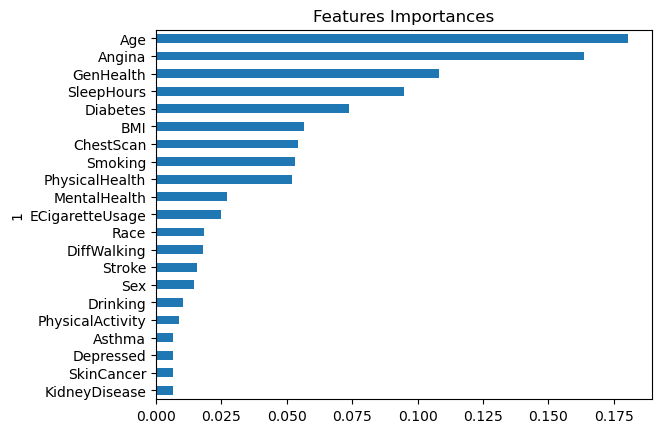

In [22]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', title= 'Features Importances', legend=False)

#### 5.2.6. Receiver Operating Characteristic (ROC)

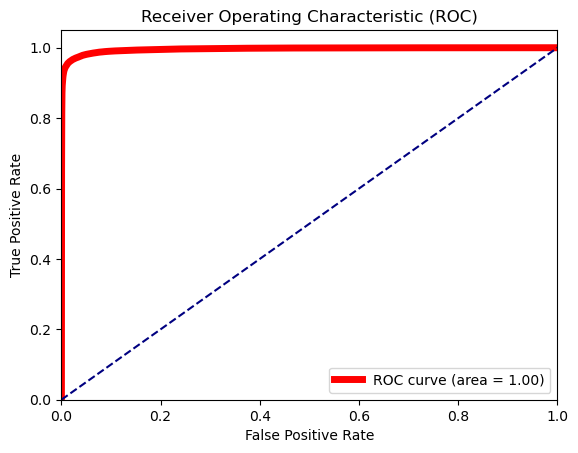

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC and AUC
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=5, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### 5.3. Deep Learning - Standard Scaler Module (Neural Network)

#### 5.3.1. Loading and Preprocessing the Dataset

In [11]:
# Copy dataset for Machine Learning
df2 = df.copy()

In [12]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df2.nunique())

Sex                    2
Age                   13
Race                   5
BMI                 3748
GenHealth              5
PhysicalHealth        31
MentalHealth          31
PhysicalActivity       2
ChestScan              2
SleepHours            23
DiffWalking            2
Smoking                4
ECigaretteUsage        4
Drinking               2
HeartAttack            2
Angina                 2
Stroke                 2
Asthma                 2
SkinCancer             2
Depressed              2
KidneyDisease          2
Diabetes               4
dtype: int64


In [13]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df2["BMI"].value_counts()
bmi_counts

BMI
26.63    3438
27.46    2642
24.41    2601
27.44    2494
27.12    2468
         ... 
60.15       1
59.13       1
20.17       1
47.28       1
28.39       1
Name: count, Length: 3748, dtype: int64

In [14]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 150].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df2['BMI'] = df2['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df2['BMI'].value_counts()

BMI
Other    72173
26.63     3438
27.46     2642
24.41     2601
27.44     2494
         ...  
25.29      152
26.94      151
26.46      150
20.48      150
26.17      150
Name: count, Length: 451, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
num_df4 = pd.get_dummies(df2)
num_df4.head()

,Sex,Age,Race,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,DiffWalking,...,BMI_42.07,BMI_42.51,BMI_42.57,BMI_42.91,BMI_43.05,BMI_43.27,BMI_44.29,BMI_44.3,BMI_44.63,BMI_Other
0,0,12,0,4,0,0,0,0,6,0,...,False,False,False,False,False,False,False,False,False,False
1,0,7,0,3,2,3,1,0,5,0,...,False,False,False,False,False,False,False,False,False,False
2,0,4,0,1,2,0,1,1,9,0,...,False,False,False,False,False,False,False,False,False,False
3,1,12,0,0,1,0,0,0,7,0,...,False,False,False,False,False,False,False,False,False,True
4,0,12,1,3,0,0,1,0,7,0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Split data into features (X) and target variable (y)
X = num_df4.drop("HeartAttack", axis=1).values
y = num_df4["HeartAttack"].values

In [17]:
# Dealing with Imbalanced Data
# Assuming X is feature DataFrame and y is target variable. Scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# *** X_resampled and y_resampled are now new balanced datasets

In [18]:
# Split the data using train_test_split # stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    stratify = y_resampled,  # to maintain the same proportion of classes in both train and test sets. 
    random_state = 78
)

#### 5.3.2. Fitting the Model

In [19]:
# Preprocess numerical data for Neural Network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler and Scale the data
#X_scaler = scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5.3.3. Compile, Train and Evaluate the Model

In [20]:
import tensorflow as tf

# Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        37,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,801 (198.44 KB)

 Trainable params: 50,801 (198.44 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 519us/step - accuracy: 0.8155 - loss: 0.3993
Epoch 2/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 7s 526us/step - accuracy: 0.8617 - loss: 0.3127
Epoch 3/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 532us/step - accuracy: 0.8795 - loss: 0.2769
Epoch 4/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 554us/step - accuracy: 0.8902 - loss: 0.2549
Epoch 5/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 534us/step - accuracy: 0.8992 - loss: 0.2365
Epoch 6/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 7s 528us/step - accuracy: 0.9048 - loss: 0.2250
Epoch 7/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 549us/step - accuracy: 0.9115 - loss: 0.2118
Epoch 8/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 535us/step - accuracy: 0.9161 - loss: 0.2026
Epoch 9/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9198 - loss: 0.1944
Epoch 10/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9224 - loss: 0.1885
Epoch 11/50
14156/14156 ━━━━━━━━━━━━━━━━━━━━ 8s 518us/step - accuracy: 0.9264 - l

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4719/4719 - 1s - 259us/step - accuracy: 0.9344 - loss: 0.1752
Loss: 0.1751588135957718, Accuracy: 0.9344128966331482


In [24]:
# Compute the TensorFlow Confusion Matrix
# Predict on the test set
y_pred = nn_model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).flatten() # a threshold of 0.5 to convert probabilities to binary class labels.

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

print('Confusion Matrix:')
print(confusion_matrix.numpy())

4719/4719 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
Confusion Matrix:
[[69716  5779]
 [ 4124 71371]]
